/tmp/ipykernel_1150852/2476129215.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


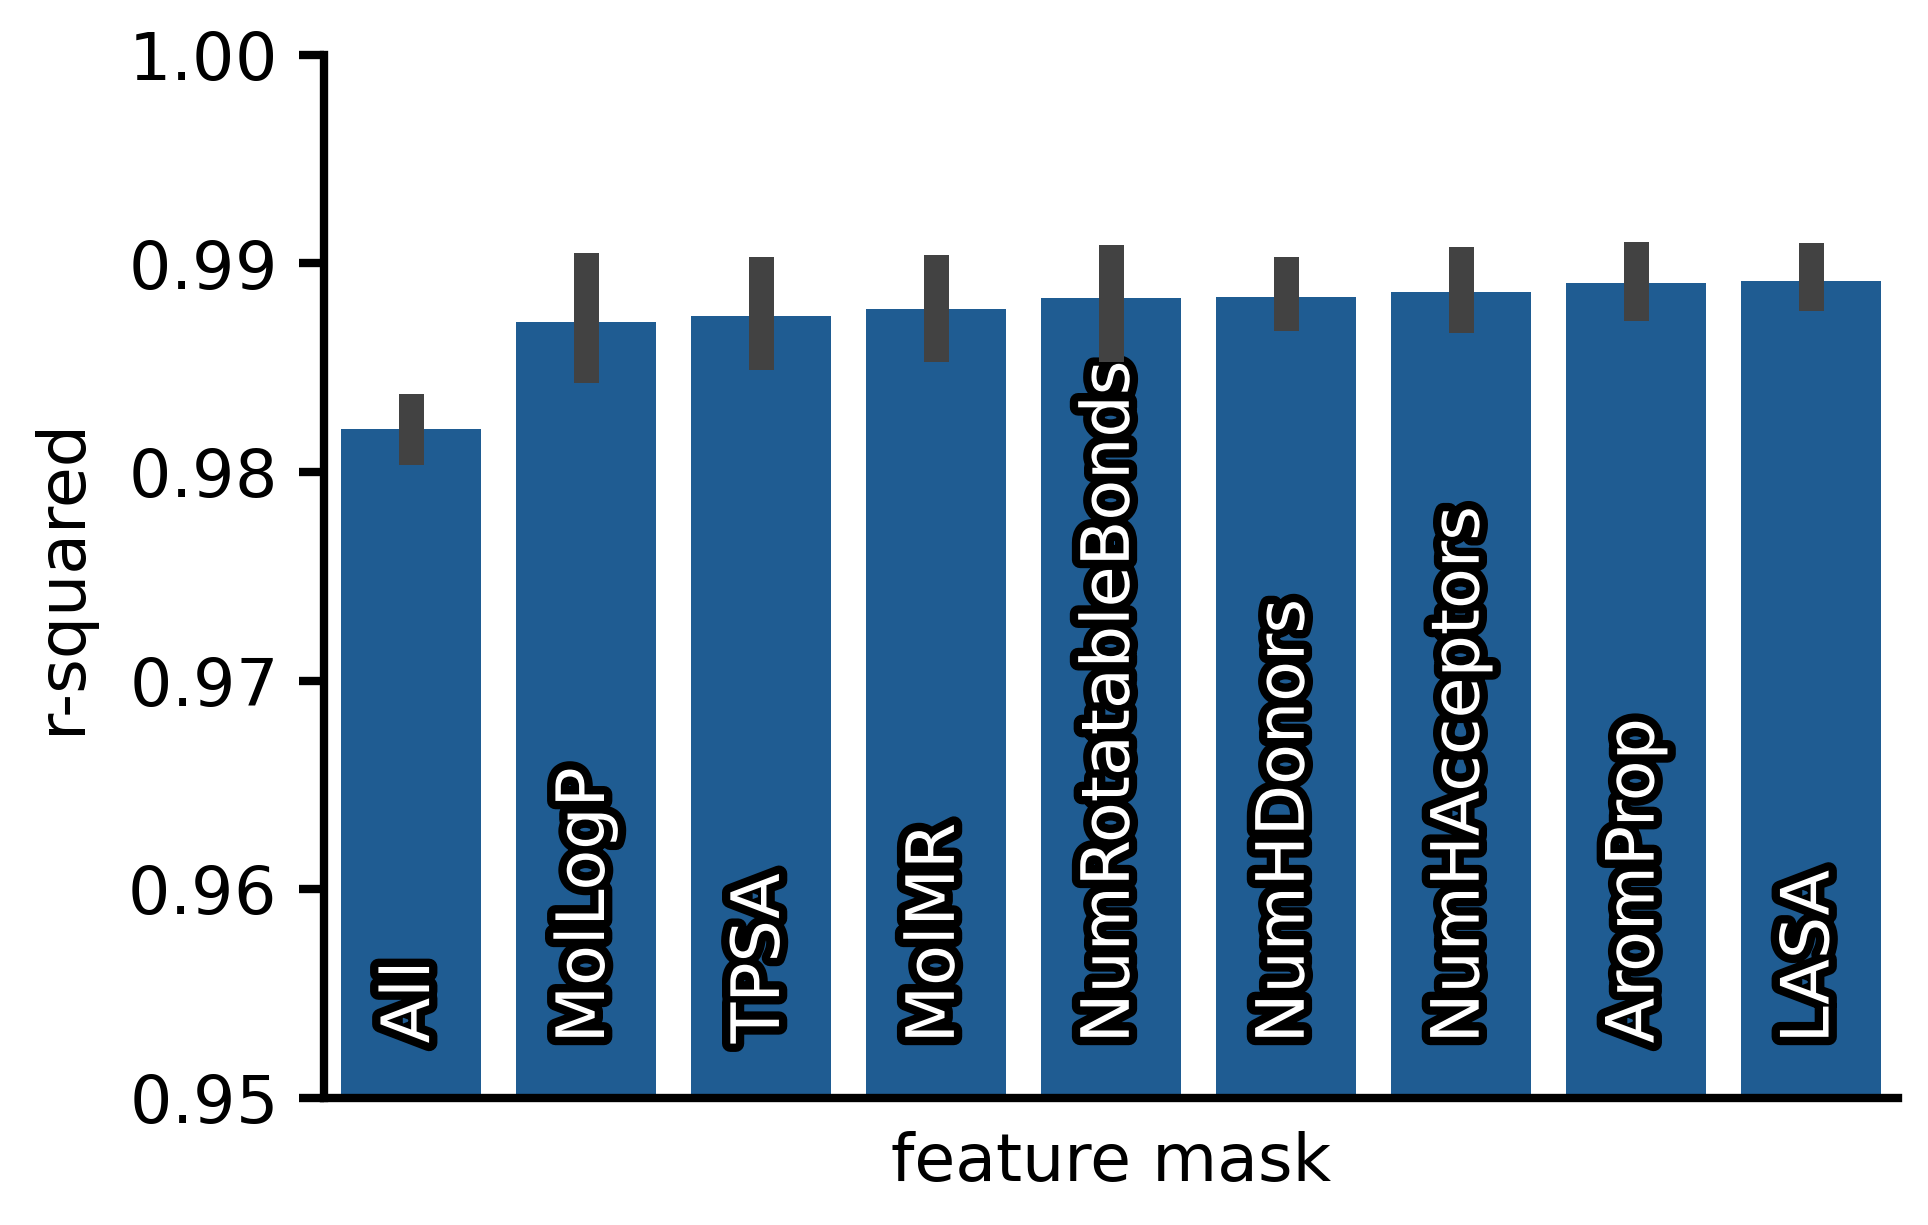

In [8]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from package import plot
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
preds = (Path().cwd() / "mask").glob("testr2_*")
lst = []
for file in preds:
    with file.open("r") as fhd:
        val = eval(fhd.read())
        r2 = val[0]["batch_averaged_test/r2"]
        lst.append([file.name.split("_")[-2], r2])
df = pd.DataFrame(lst)
df.columns = ["mask", "r2"]
features = ["TPSA", "LASA", "NumRotatableBonds", "NumHDonors", "NumHAcceptors", "MolLogP", "MolMR", "AromProp", "All", "Sig"]
df.loc[df["mask"]=="nodescriptor","mask"] = "8"
df.loc[df["mask"]=="sig","mask"] = "9"

df["mask"] = df["mask"].apply(lambda x: features[int(x)])
order = df.groupby("mask").mean()["r2"].sort_values().index
fig, ax = plt.subplots()

sns.barplot(df,x="mask",y="r2",order=order,zorder=-10)
ax.set_ylim(bottom=0.95,top=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("feature mask")
ax.set_ylabel("r-squared")
for label in ax.get_xticklabels():
    label.set_rotation(90)
    label.set_verticalalignment('bottom')  # Center alignment vertically
    label.set_y(0.1)
    label.set_color('white')
    label.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])
    label.set_zorder(10)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False)
fig.savefig("masking.pdf")

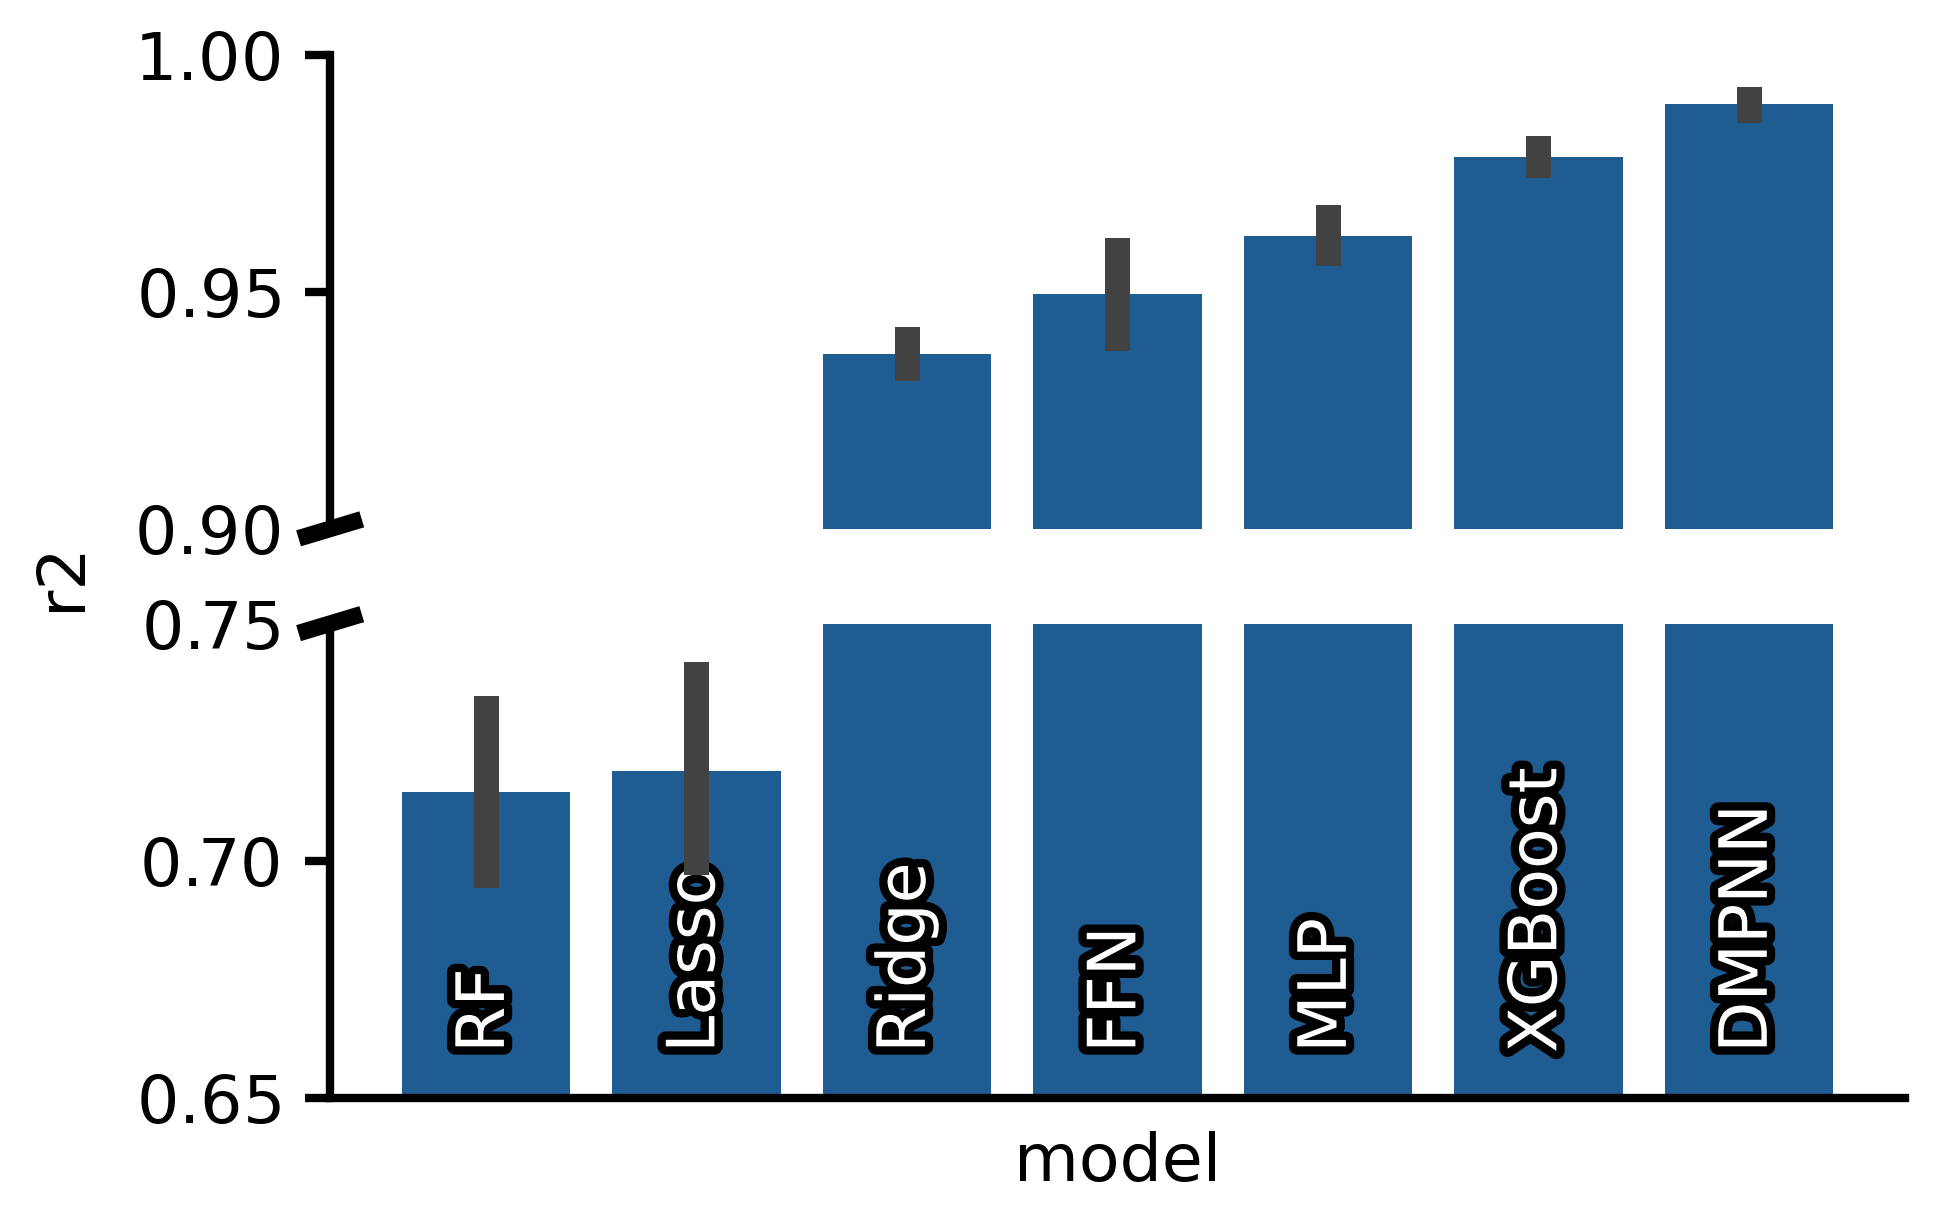

In [13]:
perf_dct = {
# "linear":[-1.95111402e+19, -6.50692697e+16, -6.10952054e+16, -2.22978565e+16, -3.52139824e+18],
"Lasso":[0.71480408, 0.7533171,  0.68961769, 0.73125985, 0.705604  ],
"Ridge":[0.9325229,  0.94038603, 0.93766374, 0.94098614, 0.93326919],
"XGBoost":[0.9787706,  0.97530457, 0.98063007, 0.97697579, 0.98067821],
"RF":[0.69742223 ,0.68523254 ,0.73478339, 0.7359476,  0.7195403 ],
"MLP":[0.95877124, 0.95719349, 0.96224141, 0.96095062, 0.9696648 ],
"FFN":[0.9570232629776001, 0.957734227180481, 0.935830295085907, 0.9366430044174194, 0.9607927203178406],
"DMPNN":[0.990231990814209, 0.9913933873176575, 0.9895720481872559, 0.9875091910362244, 0.9896097779273987]
}
perf_df = pd.DataFrame(perf_dct)
perf_df[perf_df<0]=0

melt_df = perf_df.melt(var_name="model",value_name="r2")
order = melt_df.groupby("model").mean()["r2"].sort_values().index

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.2})
sns.barplot(x="model", y="r2", data=melt_df, ax=ax_top, order=order)
sns.barplot(x="model", y="r2", data=melt_df, ax=ax_bottom, order=order)
ax_top.set_ylim(0.9,1)   # those limits are fake
ax_bottom.set_ylim(0.65,0.75)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax_top.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

for label in ax_bottom.get_xticklabels():
    label.set_rotation(90)
    label.set_verticalalignment('bottom')  # Center alignment vertically
    label.set_y(0.2)
    label.set_color('white')
    label.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])
    label.set_zorder(10)

ax.yaxis.get_major_ticks()[0].tick1line.set_markersize(0)
ax2.yaxis.get_major_ticks()[-1].tick1line.set_markersize(0)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False)

ax2.set_ylabel("")

ax.yaxis.set_label_coords(-0.15,-0.1)
f.savefig("model.pdf")